In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv('diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
df.shape

(53940, 10)

In [6]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
##droping column x,y,z 
df=df[(df[['x','y','z']] != 0).all(axis=1)]

In [11]:
## duplicates
df.duplicated().sum()

145

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [13]:
##Numerical cols
numerical_df = df.select_dtypes(['int64','float64'])
numerical_cols = numerical_df.columns
print('Numerical Columns : {}'.format(list(numerical_cols)))

Numerical Columns : ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


In [14]:
##Categorical cols
categorical_df = df.select_dtypes(['object'])
categorical_cols = categorical_df.columns
print('Categorical Columns : {}'.format(list(categorical_cols)))

Categorical Columns : ['cut', 'color', 'clarity']


## EDA

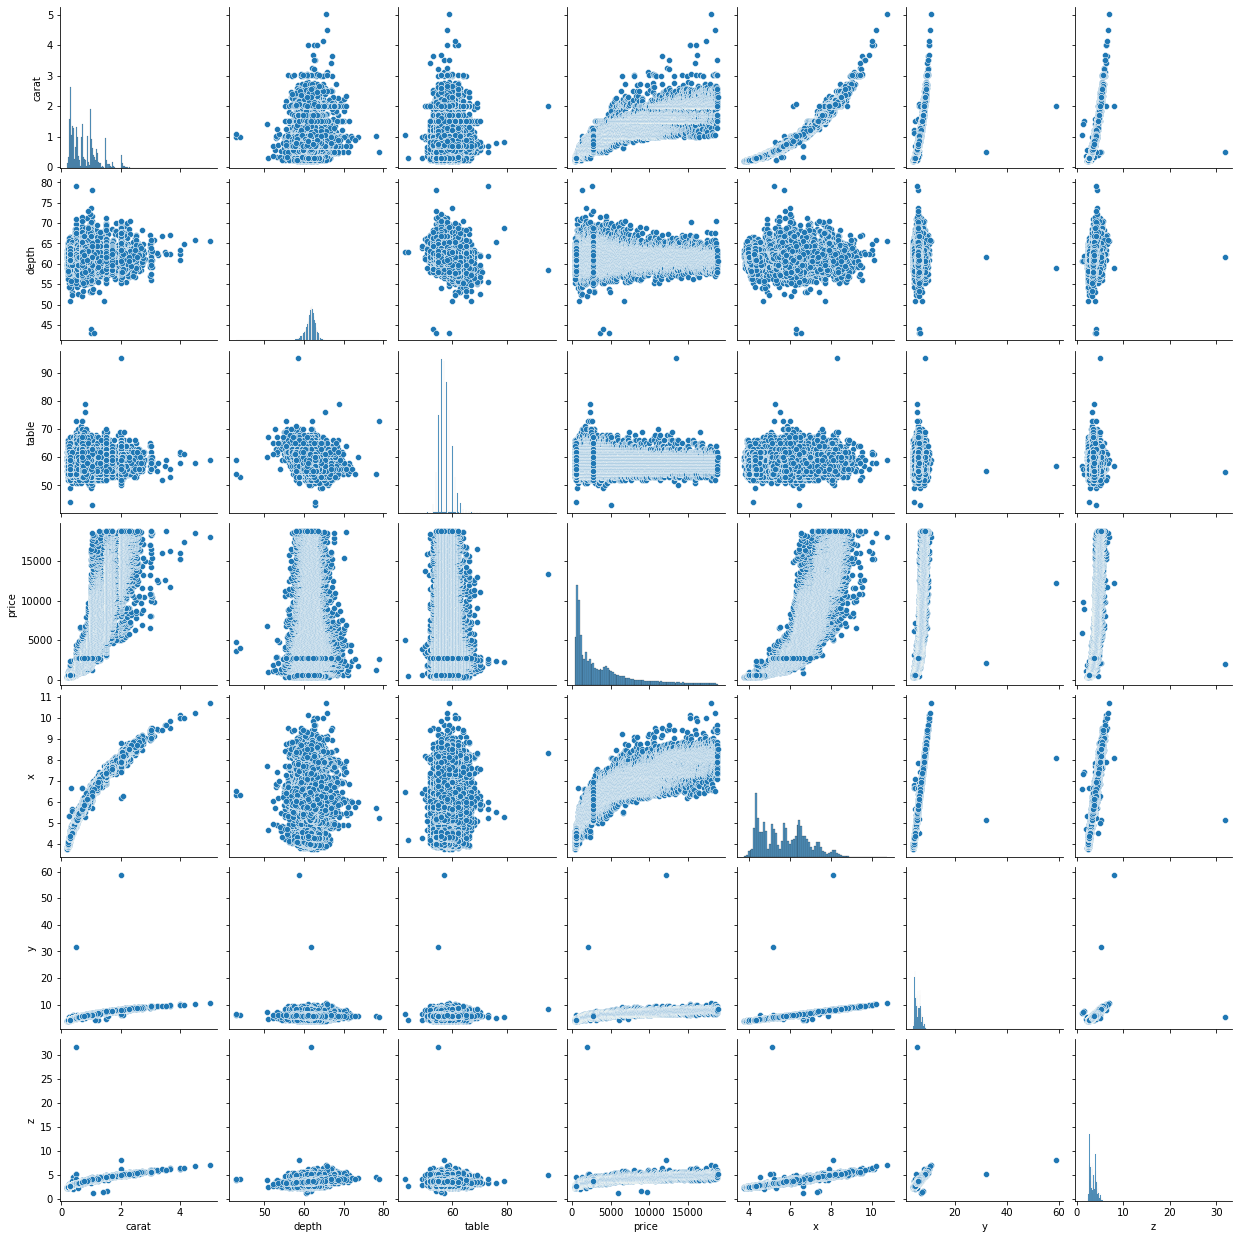

In [15]:
sns.pairplot(data=df)

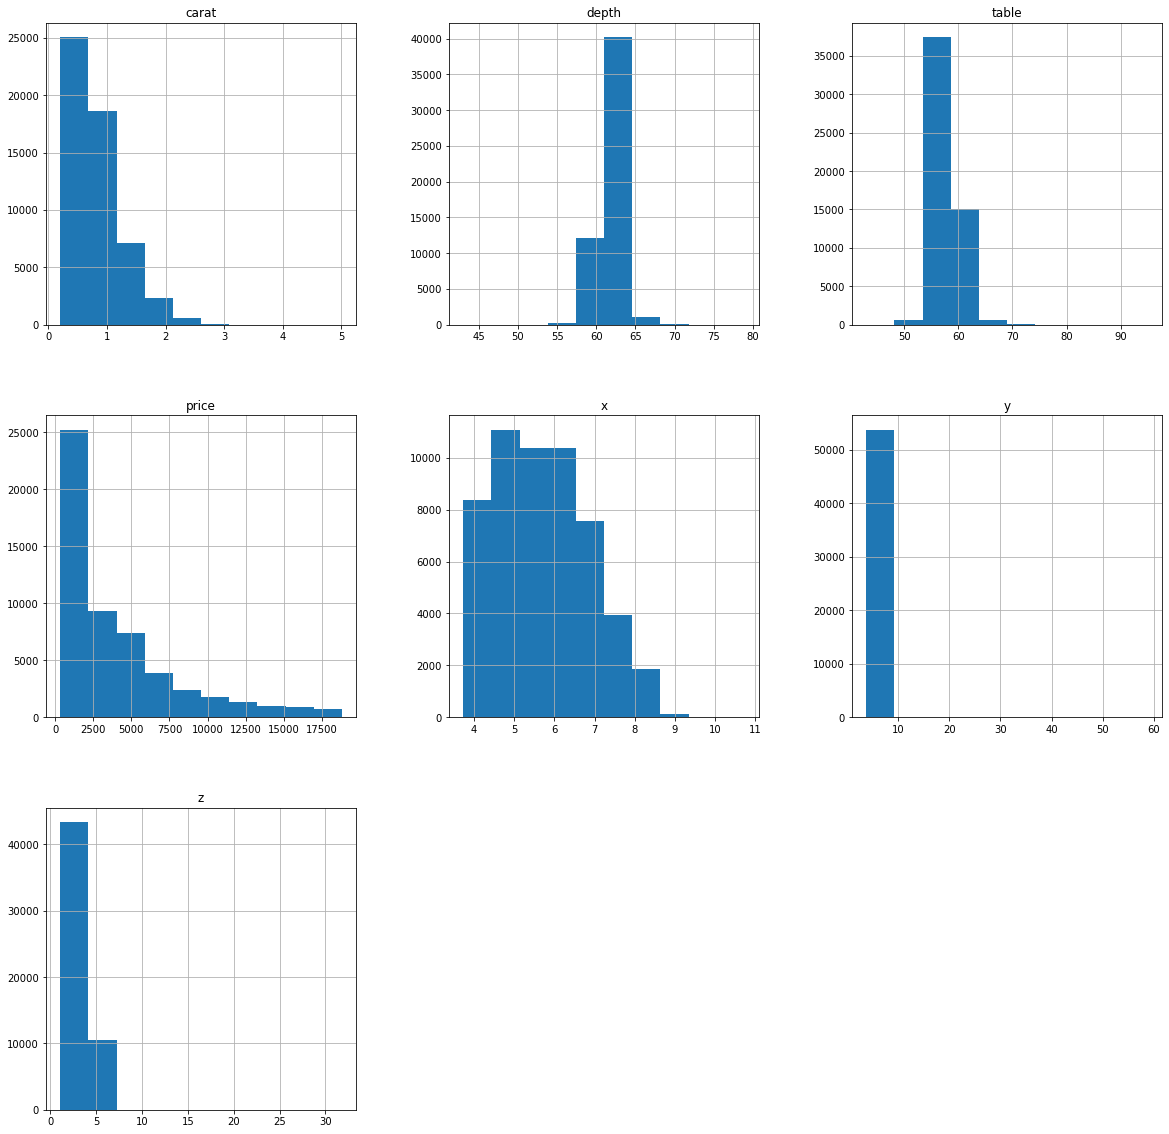

In [16]:
df.hist(figsize= (20,20))
plt.show()

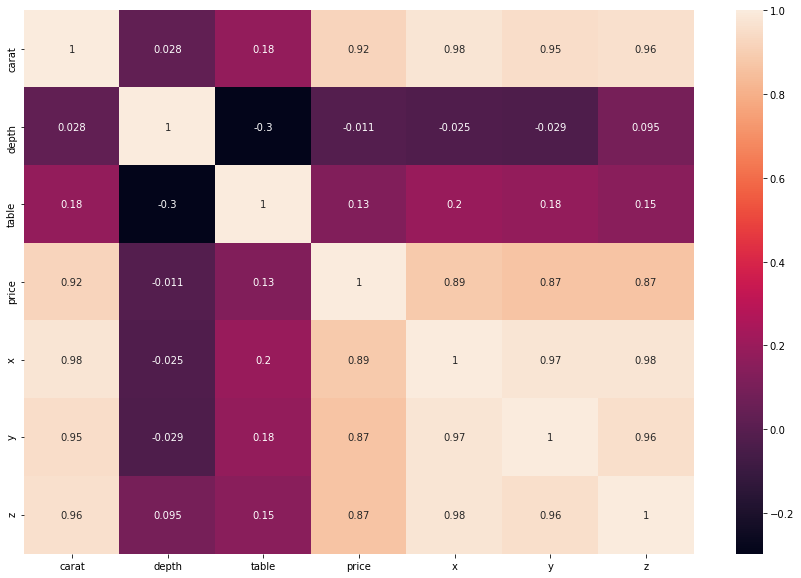

In [17]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot= True)
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler,  LabelEncoder
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()
df['cut'] = label_cut.fit_transform(df['cut'])
df['color'] = label_color.fit_transform(df['color'])
df['clarity'] = label_clarity.fit_transform(df['clarity'])

In [19]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [20]:
X = df.drop(['price'], axis=1)
Y = df['price']

In [21]:
#train and test set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [22]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [23]:
#### Without Sklearn
class KNN:
    def __init__(self,k):
        self.k=k
    def fit(self,X,Y):
        self.X=np.asarray(X)
        self.Y=np.asarray(Y)
    def predict(self,X):
        X=np.asarray(X)
        result=[]
        for X in X:
            dis=np.sqrt(np.sum((X-self.X)**2,axis=1))
            index=dis.argsort()
            index=index[:self.k]
            result.append(np.mean(self.Y[index]))
        return np.array(result)

In [ ]:
knn=KNN(k=5)
knn.fit(xtrain,ytrain)
y_pred=knn.predict(xtest)
display(y_pred)

In [ ]:
### With sklearn 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
clf_knn = KNeighborsRegressor()
clf_knn.fit(xtrain , ytrain)
accuracies = cross_val_score(estimator = clf_knn, X = xtrain, y = ytrain, cv = 5,verbose = 1)
y_pred = clf_knn.predict(xtest)
print('Score : %.4f' % clf_knn.score(xtest, ytest))
print(accuracies)